# Dimensionality Reduction

In this lab, we will play with various models for dimensionality reduction, starting with Principal Component Analysis (PCA). So, for starters, let's get some data.

In [12]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(60000, 784)
Let's plot the first image in the set, both as the raw 
image and the mean-subtracted image. This is a digit 5


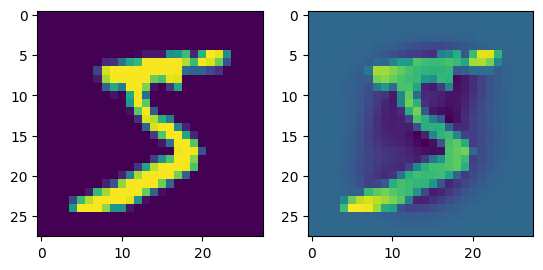

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#for x in x_train,y_train,x_test,y_test:
#    print(x.shape)

def toVec(img):
    return img.flatten()
def toImg(v):
    return v.reshape(28,28)

x_train= x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)
print(x_train.shape)
plt.imshow(toImg(x_train[2,:]),cmap="gray")

imgMean = np.mean(x_train,0)

print("""Let's plot the first image in the set, both as the raw 
image and the mean-subtracted image. This is a digit %d""" % (y_train[0]))
train_meansub = x_train - imgMean
test_meansub  = x_test - imgMean
plt.clf()
plt.subplot(1,2,1)
plt.imshow(toImg(x_train[0,:]))
plt.subplot(1,2,2)
plt.imshow(toImg(train_meansub[0,:]))

So now we have each image in vector-format in ``x_train``, the corresponding labels in ``y_train``. The mean-subtracted datapoints are in ``xt_meansub``. 

## 1. Principal Component Analysis

**Question** Based on the dimensionality of ``x_train``, do we need to use standard PCA or the modified version for high-dimensional data that is used for eigenfaces?

*The vectors are much smaller than the number of datapoints, so standard PCA is more efficient (and probably the only possible approach on the hardware you have access to).*

**Question** Now do the eigenvector-eigenvalue decomposition of the covariance matrix (using the appropriate approach), and create a plot of the decreasing eigenvalues. How many eigenvectors would you say are appropriate based on this?

(784, 784)


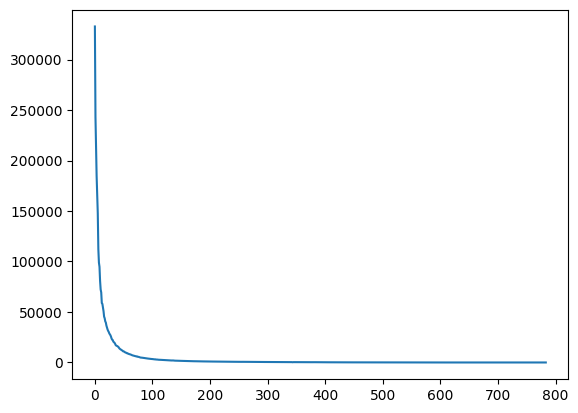

In [21]:
from numpy.linalg import eig

S = np.cov(train_meansub,rowvar=False)
print(S.shape)

val,vect = eig(S)

plt.plot(val)

**Question** Plot the first few eigenvectors as images. This illustrates how, in projection, this eigenvector will modify the mean image to recreate the original digit. Notice how these vectors contain both positive and negative elements, so that they will combine positive and negative contributions to the different elements of the datapoint. This is how they capture the correlations between dimensions in data space.

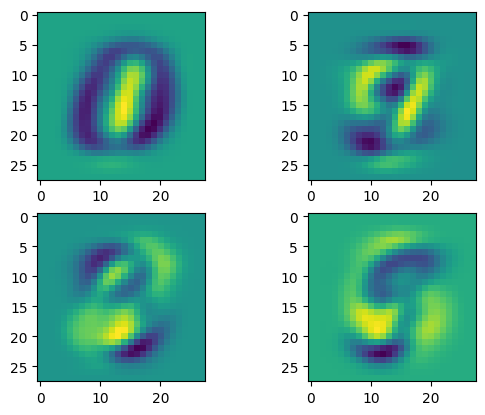

In [22]:
plt.subplot(2,2,1)
plt.imshow(toImg(vect[:,0]))
plt.subplot(2,2,2)
plt.imshow(toImg(vect[:,1]))
plt.subplot(2,2,3)
plt.imshow(toImg(vect[:,2]))
plt.subplot(2,2,4)
plt.imshow(toImg(vect[:,3]))


### Projection

**Question** Project the first digit of the training set onto the first 100 eigenvalues that we had decomposed the covariance matrix into.  

Projection of the digit on the first 100 eigenvectors: [-123.93258866 -312.67426202  -24.51405176 -555.75795794   27.29666823
 -232.47628435  233.99573343 -159.79949383 -363.51502076 -198.42807734
  197.49702518  254.05591279  113.4964087   749.30245114  219.25955388
    4.69324059 -330.15199166 -309.15388607 -277.59386988  166.33237119
  -27.54185704  -64.35330727  217.17832755 -250.24442545  -46.166068
 -100.33944406  308.00676859 -170.1051332  -125.51429047  123.39969124
   97.95794712   34.57519123 -107.48433483   84.5984679   152.40307111
 -200.80289675  -65.24080032 -200.21912838 -157.66054593  359.74286053
  185.58710898  154.45011126   40.24263086  -84.96585456 -123.86997917
   -7.08801921 -127.54079891   76.43734886   34.1432681    19.98621118
 -130.24151072 -109.5553829  -118.3755218   -87.60119904   -3.10258115
 -117.48114329  164.08696674  -60.7755625  -149.79526337  125.81675249
   66.86255058    5.28013516   81.35279816  -83.67315021 -179.83391208
 -120.93769855  190.9670

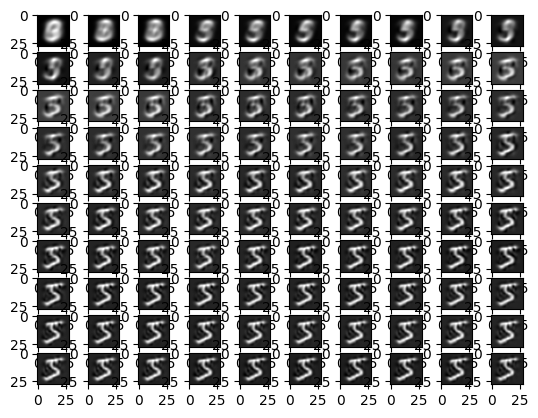

In [23]:
proj = np.dot(train_meansub[0,:],vect[:,0:100])
print("Projection of the digit on the first 100 eigenvectors:",proj)

x = imgMean.copy()
for i in range(100):
    x += vect[:,i]*proj[i]
    plt.subplot(10,10,i+1)
    plt.imshow(toImg(x), cmap="gray")


**Question** Now project all of the test data onto the first two PCA components and plot these points with a colour-coding provided by the corresponding digit labels.

(10000, 2) (10000,)


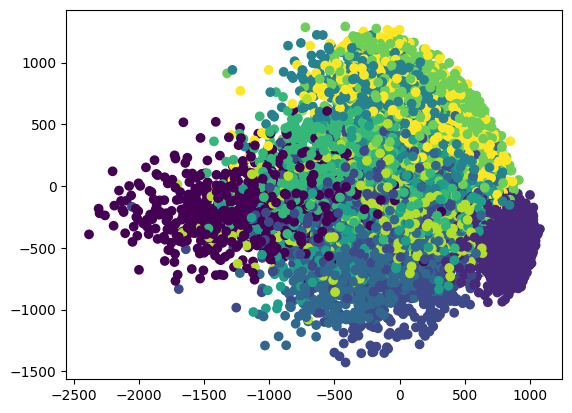

In [24]:
proj = np.dot(test_meansub[:,:],vect[:,0:2])

colours = [ [0,0,0],[]]

print(proj.shape,y_test.shape)
plt.scatter(proj[:,0],proj[:,1],c=y_test)

### 1.2 projection of data on manifold

As an illustration of how data can lie on a restricted manifold in a high-dimensional space, let's create an artificial dataset of rotated images. We will then project these images down to a lower-dimensional space using PCA.

In [25]:
# uncomment and run the following line if the import below fails
# !pip install opencv-python
import cv2

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result 

rotdata = np.zeros((360,28*28))
for i in range(360):
    rotdata[i,:]=toVec(rotate_image(toImg(train_meansub[2,:]),i))

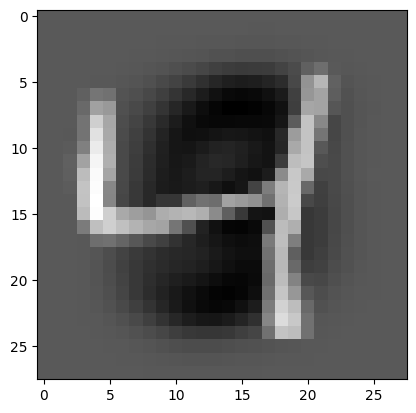

In [26]:
    
plt.imshow(toImg(rotdata[2,:]),cmap="gray")

**Question** Now perform PCA on this dataset, and keep the first three principal component vectors. Project the images onto these three components, and plot the 3D projections as a 3D scatterplot.

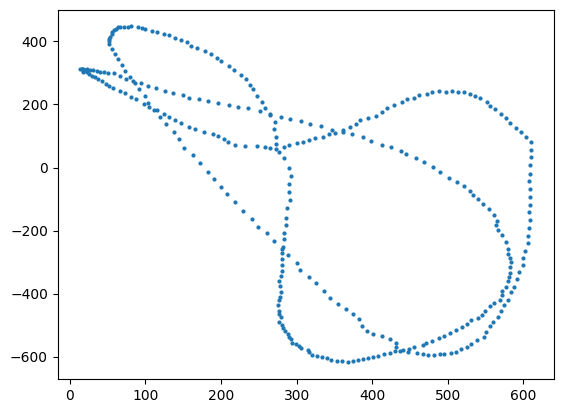

In [27]:
# %matplotlib widget # Requires ipympl

S = np.cov(rotdata,rowvar=False)
rval,rvec = eig(S)
proj = np.dot(rotdata,vect[:,0:3])
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(proj[:,0],proj[:,1],proj[:,2])
#plt.figure()
plt.scatter(proj[:,0],proj[:,1],s=4)


## 2. t-SNE

**Question** From the above, it is clear that 2 principal components do not suffice to separate the different digits using linear projection. Let's compare this to an embedding method such as t-SNE. Use the sklearn implementation of t-SNE to create an embedding of the training data, and plot it in the same way as you did for the PCA projection. You can start with a subset of the data to save time.

In [50]:
from sklearn.manifold import TSNE

# Your code comes here:
emb = TSNE(perplexity=10).fit_transform(x_train[0:60000,:])
print(emb.shape)
#plt.scatter(emb)

(60000, 2)


(60000,) (60000,)


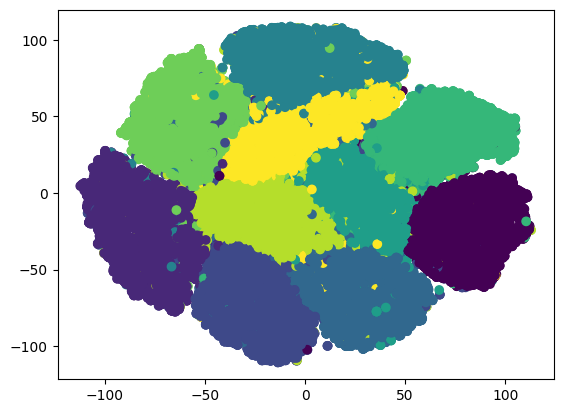

In [51]:
print(emb[:,1].shape,y_train.shape)

plt.scatter(emb[:,0],emb[:,1],c=np.real(y_train))

## 3. Autoencoder

Finally, use tenserflow and Keras to create a simple 
autoencoder and represent the same data. 

**Question** Use multiple hidden layers to allow for non-linear representations, and rescale the pixel values to lie in the interval 0-1, so that you can use sigmoidal functions for the activation function of the output. 

Play with the number of dimensions in the hidden layer. How low can you go and still get a good reconstruction error? Is the data separable in low-dimensional space?

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Model

X_std = x_train/255.0
n_train = int(0.75*X_std.shape[0])
n_val = int(0.25*X_std.shape[0])

X_train = X_std[:n_train]
X_val = X_std[n_train:n_train+n_val]

print (X_train.shape, X_val.shape)

########## Preparing the Auto Encoder ##########

inp = Input(shape = (784, ))                  # Using Keras Functional API
embedding_dim = 12                            # Dimensions of hidden vector representation

fc1 = Dense(256)(inp)
ac1 = Activation('tanh')(fc1)
# dp1 = Dropout(.8)(ac1)
fc2 = Dense(embedding_dim)(ac1)
ac2 = Activation('tanh')(fc2)

fc3 = Dense(256)(ac2)
ac3 = Activation('tanh')(fc3)

fc4 = Dense(784)(ac3)
ac4 = Activation('sigmoid')(fc4)

autoencoder = Model(inputs = inp, outputs = ac4)

########## Listing the layers used in Auto Encoder to form Encoder/Decoder ##########

print()
for layer in range(len(autoencoder.layers)):
    print(layer,autoencoder.layers[layer])
print()

########## Preparing the Encoder and Decoder from Auto-Encoder's layers ##########

(45000, 784) (15000, 784)

0 <keras.engine.input_layer.InputLayer object at 0x7f36f5ce16d0>
1 <keras.layers.core.dense.Dense object at 0x7f3716fc2b80>
2 <keras.layers.core.activation.Activation object at 0x7f3716fd2280>
3 <keras.layers.core.dense.Dense object at 0x7f36f5feb250>
4 <keras.layers.core.activation.Activation object at 0x7f3717145070>
5 <keras.layers.core.dense.Dense object at 0x7f371713a970>
6 <keras.layers.core.activation.Activation object at 0x7f37177d1460>
7 <keras.layers.core.dense.Dense object at 0x7f37177d1970>
8 <keras.layers.core.activation.Activation object at 0x7f37177d1370>



2024-10-23 22:19:31.456654: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: /usr/lib/x86_64-linux-gnu/libcuda.so.1: file too short; LD_LIBRARY_PATH: /home/jovyan/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-10-23 22:19:31.456684: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [29]:
encoder = Model(inputs = inp, outputs = ac2)

dec_inp = Input(shape=(embedding_dim,))
x = autoencoder.layers[5](dec_inp)
x = autoencoder.layers[6](x)
x = autoencoder.layers[7](x)
x = autoencoder.layers[8](x)

decoder = Model(inputs = dec_inp, outputs = x)

########## Compiling and fiting the Auto Encoder ##########

autoencoder.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

In [43]:
hist = autoencoder.fit(X_train, X_train, epochs=25, batch_size=100, shuffle=True, validation_data=(X_val, X_val))

auto_encoder_encodes = encoder.predict(X_train)                  # Encoder generates a hidden-dimension (64 dim) representation of original data (784 dim)
auto_encoder_decodes = decoder.predict(auto_encoder_encodes)     # Decoder decodes hidden-representation (64 dim) given by encoder to dimensions of input data (784 dim)

Epoch 1/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0150 - accuracy: 0.0164 - val_loss: 0.0165 - val_accuracy: 0.0183
Epoch 2/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0149 - accuracy: 0.0163 - val_loss: 0.0161 - val_accuracy: 0.0175
Epoch 3/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0149 - accuracy: 0.0162 - val_loss: 0.0162 - val_accuracy: 0.0172
Epoch 4/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0148 - accuracy: 0.0159 - val_loss: 0.0161 - val_accuracy: 0.0193
Epoch 5/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0147 - accuracy: 0.0161 - val_loss: 0.0161 - val_accuracy: 0.0183
Epoch 6/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0147 - accuracy: 0.0156 - val_loss: 0.0161 - val_accuracy: 0.0167
Epoch 7/25
450/450 [==============================] - 2s 5ms/step - loss: 0.0146 - accuracy: 0.0161 - val_loss: 0.0160 - val_accuracy: 0.0184
Epoch 

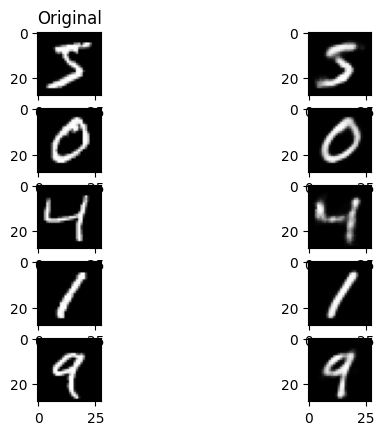

In [44]:
for ix in range(5):
    plt.subplot(5, 2, ((ix) * 2) + 1)
    if ix==0:
        plt.title('Original')
    plt.imshow(X_train[ix].reshape((28, 28)), cmap='gray')
    plt.subplot(5, 2, ((ix) * 2) + 2)
    if ix==5:
        plt.title('A-E Regen.')
    plt.imshow(auto_encoder_decodes[ix].reshape((28, 28)), cmap='gray')
plt.show()

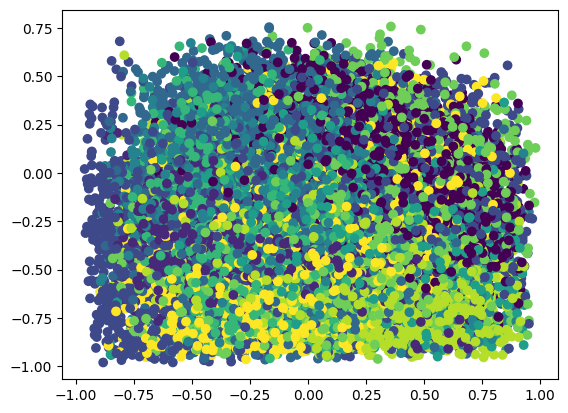

In [45]:
plt.scatter(auto_encoder_encodes[:,0],auto_encoder_encodes[:,1],c=10*y_train[0:len(auto_encoder_encodes)])

In [46]:
def deg2rad(d):
    return (d*np.pi)/180

def plotAngle(d):
    r =deg2rad(d)
    s=np.sin(r)
    c=np.cos(r)
    plt.plot([0,c],[0,s],'b-')
    plt.scatter(c,s,c='r')    
    
def makeImages(idx):
    for i in range(360):
        plt.imshow(255-rotate_image(toImg(x_train[idx,:]),i),cmap="gray")
        plt.savefig("rot-%03d.jpeg" %(i),bbox_inches="tight")
        plt.close()

    angles = np.linspace(0,2*np.pi,360)
    for i in range(360):
        plt.figure()
        plt.axis('equal')
        plt.plot(np.cos(angles),np.sin(angles),'-')
        plotAngle(i)
        plt.savefig("angle-%03d.jpeg" % (i),bbox_inches="tight")
        plt.close()        
    
    rotdata = np.zeros((360,28*28))
    for i in range(360):
        rotdata[i,:]=toVec(rotate_image(toImg(train_meansub[idx,:]),i))
        
    S = np.cov(rotdata,rowvar=False)
    rval,rvec = eig(S)
    proj = np.dot(rotdata,vect[:,0:2])
    plt.scatter(proj[:,0],proj[:,1],s=4)
    
    for i in range(360):
        plt.figure()
        plt.scatter(proj[:,0],proj[:,1],s=4)
        plt.scatter(proj[i,0],proj[i,1],s=64,c='r')
        plt.savefig("proj-%03d.jpeg" % (i),bbox_inches="tight")
        plt.close()

    

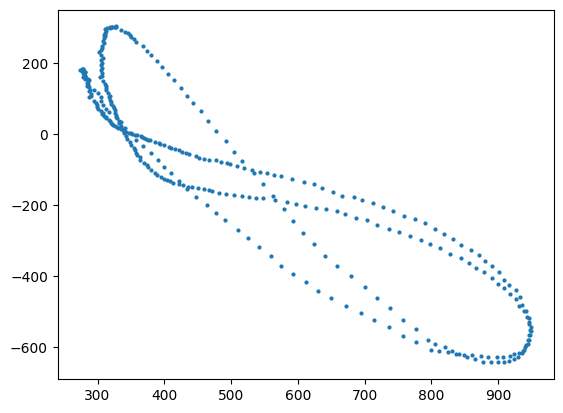

In [47]:
makeImages(3)

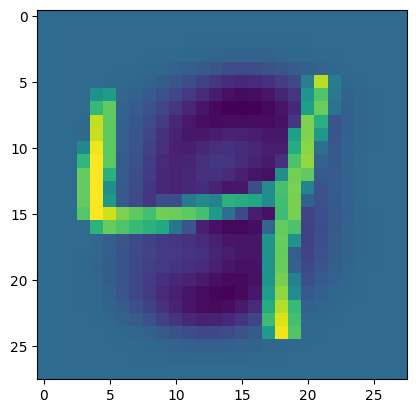

In [48]:
plt.imshow(toImg(train_meansub[2,:]))

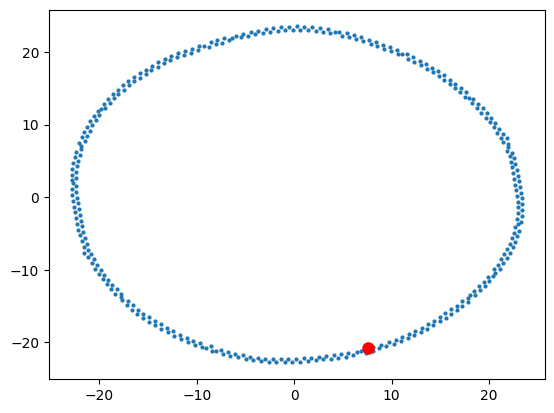

In [52]:
rotdata = np.zeros((360,28*28))
for i in range(360):
    rotdata[i,:]=toVec(rotate_image(toImg(train_meansub[2,:]),i))

emb = TSNE(perplexity=20).fit_transform(rotdata)

plt.scatter(emb[:,0],emb[:,1],s=4)
plt.scatter(emb[1,0],emb[1,1],c='r',s=64)